In [2]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

headers = ['class', 'largestSpot', 'spotDistribution', 'activity', 'evolution', 'previousActivity', 'complex',
           'complexOnPath', 'area', 'largestSpotArea', 'c-class', 'm-class', 'x-class']

df = pd.read_csv('SolarFlare_Clean.csv', header=None, names=headers)

df.head()

,class,largestSpot,spotDistribution,activity,evolution,previousActivity,complex,complexOnPath,area,largestSpotArea,c-class,m-class,x-class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
activity,1066.0,1.153846,0.360971,1.0,1.0,1.0,1.0,2.0
evolution,1066.0,2.401501,0.620584,1.0,2.0,2.0,3.0,3.0
previousActivity,1066.0,1.059099,0.320324,1.0,1.0,1.0,1.0,3.0
complex,1066.0,1.404315,0.490989,1.0,1.0,1.0,2.0,2.0
complexOnPath,1066.0,1.875235,0.330608,1.0,2.0,2.0,2.0,2.0
area,1066.0,1.025328,0.157194,1.0,1.0,1.0,1.0,2.0
largestSpotArea,1066.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
c-class,1066.0,0.300188,0.835784,0.0,0.0,0.0,0.0,8.0
m-class,1066.0,0.046904,0.302811,0.0,0.0,0.0,0.0,5.0
x-class,1066.0,0.005629,0.086487,0.0,0.0,0.0,0.0,2.0


In [4]:
df.drop(['largestSpotArea'], axis = 1, inplace = True)

In [5]:
df.head()

,class,largestSpot,spotDistribution,activity,evolution,previousActivity,complex,complexOnPath,area,c-class,m-class,x-class
0,H,A,X,1,3,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,0,0,0
2,C,S,O,1,3,1,1,2,1,0,0,0
3,H,R,X,1,2,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,0,0,0


In [6]:
df.corr()

,activity,evolution,previousActivity,complex,complexOnPath,area,c-class,m-class,x-class
activity,1.000000,0.000645,0.400409,0.279160,0.145256,0.245672,0.260717,0.114317,0.122619
evolution,0.000645,1.000000,-0.015562,-0.160388,0.029288,0.068912,0.057061,0.074575,0.027833
previousActivity,0.400409,-0.015562,1.000000,0.164349,0.069692,0.268607,0.158136,0.135960,0.123554
complex,0.279160,-0.160388,0.164349,1.000000,0.073891,0.195669,0.168451,0.099685,0.079030
complexOnPath,0.145256,0.029288,0.069692,0.073891,1.000000,0.060864,0.108486,0.049131,0.024583
area,0.245672,0.068912,0.268607,0.195669,0.060864,1.000000,0.149335,0.251184,0.334833
c-class,0.260717,0.057061,0.158136,0.168451,0.108486,0.149335,1.000000,0.148369,0.028563
m-class,0.114317,0.074575,0.135960,0.099685,0.049131,0.251184,0.148369,1.000000,0.420147
x-class,0.122619,0.027833,0.123554,0.079030,0.024583,0.334833,0.028563,0.420147,1.000000


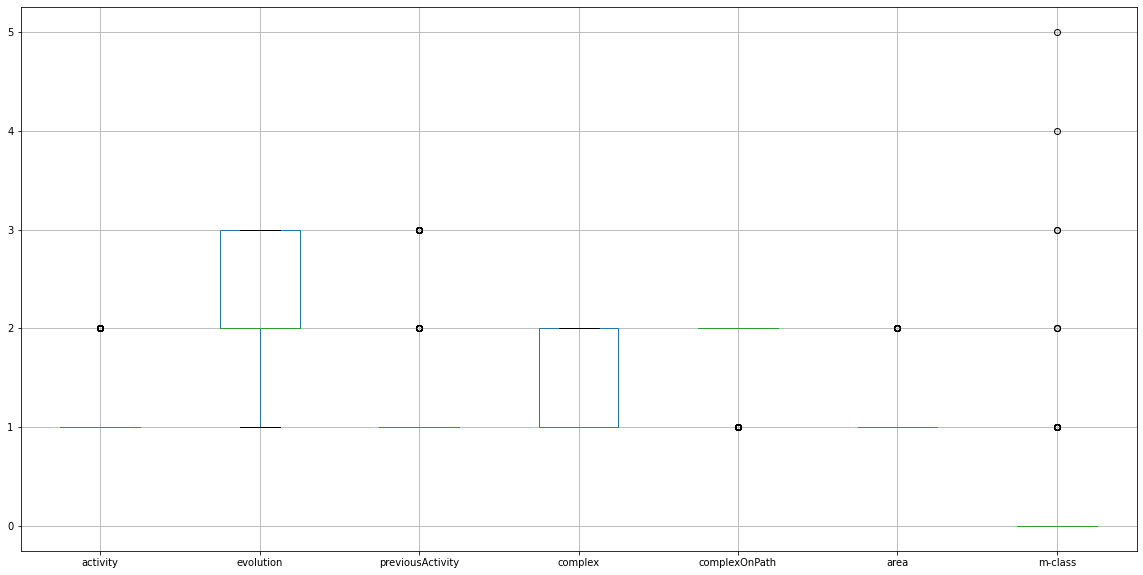

In [9]:
m_class = df.drop(["c-class", "x-class"], axis=1)

m_class.boxplot(figsize=(20, 10))